In [1]:
import torch

In [2]:
import syft as sy

In [3]:
hook = sy.TorchHook(torch)

In [4]:
# Create Virtual workers, Bob and Alice
bob = sy.VirtualWorker(hook, id='bob')
alice = sy.VirtualWorker(hook, id='alice')

In [5]:
# Create Sketch Data for training
data = torch.tensor([[0., 0.], [0, 1], [1, 0], [1, 1]], requires_grad=True)
target = torch.tensor([[0.], [1], [1], [1]], requires_grad=True)

In [6]:
data_bob = data[0:2].send(bob)
target_bob = target[0:2].send(bob)

In [7]:
data_alice = data[2:].send(alice)
target_alice = target[2:].send(alice)

In [8]:
from torch import nn, optim

In [9]:
model = nn.Linear(2, 1)

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [11]:
all_data = [(data_bob, target_bob), (data_alice, target_alice)]

In [12]:
# _data, _target = all_data[0]
torch.manual_seed(7)

In [13]:
loss_user_1 = []
loss_user_2 = []
for i in range(20):
    
    for _data, _target in all_data:
        # se nd model to the data
        model = model.send(_data.location)

        # Emove the accumulated weights
        optimizer.zero_grad()

        # Make Predictions
        pred = model(_data)

        #Calculate the loss
        # loss = ((pred -_target)**2).sum()
        loss = criterion(pred , _target)

        # Perform the backward propagation
        loss.backward()

        # Update the weights
        optimizer.step()

        # Get a smarter model
        model.get()

        # Print the loss value
        LL = loss.get()
        loss_user_1.append(LL.item()) if i%2 == 0 else loss_user_2.append(LL.item())

        print(LL)
    

tensor(0.4545, requires_grad=True)
tensor(0.9405, requires_grad=True)
tensor(0.4237, requires_grad=True)
tensor(0.8387, requires_grad=True)
tensor(0.3972, requires_grad=True)
tensor(0.7486, requires_grad=True)
tensor(0.3743, requires_grad=True)
tensor(0.6687, requires_grad=True)
tensor(0.3547, requires_grad=True)
tensor(0.5979, requires_grad=True)
tensor(0.3378, requires_grad=True)
tensor(0.5351, requires_grad=True)
tensor(0.3234, requires_grad=True)
tensor(0.4794, requires_grad=True)
tensor(0.3109, requires_grad=True)
tensor(0.4299, requires_grad=True)
tensor(0.3003, requires_grad=True)
tensor(0.3859, requires_grad=True)
tensor(0.2911, requires_grad=True)
tensor(0.3469, requires_grad=True)
tensor(0.2833, requires_grad=True)
tensor(0.3122, requires_grad=True)
tensor(0.2766, requires_grad=True)
tensor(0.2813, requires_grad=True)
tensor(0.2708, requires_grad=True)
tensor(0.2538, requires_grad=True)
tensor(0.2659, requires_grad=True)
tensor(0.2293, requires_grad=True)
tensor(0.2616, requi

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

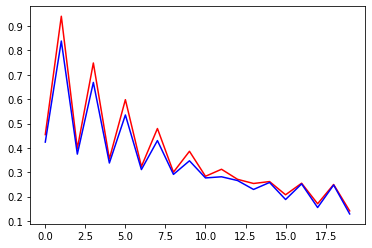

In [15]:
plt.plot(loss_user_1, color='r')
plt.plot(loss_user_2, color='b')